In [1]:
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/sabsr3/xchem/fragment_network_merges/data/filtered/overlapFiltered.csv')
df

,Merge,Fragment A ID,Fragment A smiles,Fragment B ID,Fragment B smiles,Synthon,Smiles,Target ID,Target smiles,Fragment A file,Fragment B file,Embedded,Fragment A protein file,Fragment B protein file
0,x0107_x0678t,x0107,CC(=O)Nc1cnccc1C,x0678,NC(=O)CC1CCCCC1,[Xe]C1CCCCC1,Cc1ccncc1NC(C)C1CCCCC1,x0678,O=C(CC1CCCCC1)Nc1cccnc1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
1,x0305_x2569t,x0305,CCNc1ccc(C#N)cn1,x2569,NC(=O)Cc1cccnc1,[Xe]c1cccnc1,CC(C)(CNC(=O)C(=O)O)c1cccnc1,x2569,N#Cc1cncc(CC(=O)Nc2cccnc2)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
2,x0107_x2572t,x0107,CC(=O)Nc1cnccc1C,x2572,N#Cc1cccc(CC(N)=O)c1,[Xe]c1ccccc1,CCOC(=O)c1cnccc1Cc1ccccc1,x2572,Cc1ccncc1NC(=O)Cc1cccc(C#N)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
3,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],CCC(Nc1cccnc1)c1ccc(C)cc1,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
4,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],CC(=CC(=O)c1ccc(C)cc1)NCc1cccnc1,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,x0107_x1382,x0107,CC(=O)Nc1cnccc1C,x1382,CC(NC(=O)CCl)c1cccc(Cl)c1,Cl[Xe],Cc1c(Cl)cncc1C(=O)NNC(=O)OC(C)(C)C,x2646,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
295,x0107_x1382,x0107,CC(=O)Nc1cnccc1C,x1382,CC(NC(=O)CCl)c1cccc(Cl)c1,Cl[Xe],Cc1c(Cl)cncc1NC(=N)NCC(C)C,x2646,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
296,x0107_x1382,x0107,CC(=O)Nc1cnccc1C,x1382,CC(NC(=O)CCl)c1cccc(Cl)c1,Cl[Xe],Cc1c(Cl)cncc1NC(=N)NC(C)(C)C,x2646,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
297,x0107_x1382,x0107,CC(=O)Nc1cnccc1C,x1382,CC(NC(=O)CCl)c1cccc(Cl)c1,Cl[Xe],Clc1cnccc1CN1CCCC2(CCCCCC2)C1,x2646,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...


In [36]:
# G_bound is : data['Energy']['ligand_ref2015']['total_score']
# G_unbound is : data['Energy']['unbound_ref2015']['total_score']
# the combined RMSD is data['mRMSD']
# data['RMSDs'] - find values not equal to None to get number regarded

all_data = {}

for folder in os.listdir('/home/sabsr3/xchem/Fragmenstein/output/filtered'):
    path = os.path.join('/home/sabsr3/xchem/Fragmenstein/output/filtered', folder)
    for f in os.listdir(path):
        if 'minimised.json' in f:
            d = {}
            json_path = os.path.join(path, f)
            json_file = open(json_path)
            data = json.load(json_file)
            d['G_bound'] = data['Energy']['ligand_ref2015']['total_score']
            d['G_unbound'] = data['Energy']['unbound_ref2015']['total_score']
            d['comRMSD'] = data['mRMSD']
            regarded = 0
            for rmsd in data['RMSDs']:
                if rmsd != None:
                    regarded += 1
            d['regarded'] = regarded
            name = f.replace('.minimised.json', '')
            all_data[name] = d

In [47]:
deltaGs = []
regarded = []
comRMSDs = []

for merge in all_data:
    deltaG = all_data[merge]['G_bound'] - all_data[merge]['G_unbound']
    deltaGs.append(deltaG)
    regarded.append(all_data[merge]['regarded'])
    comRMSDs.append(all_data[merge]['comRMSD'])

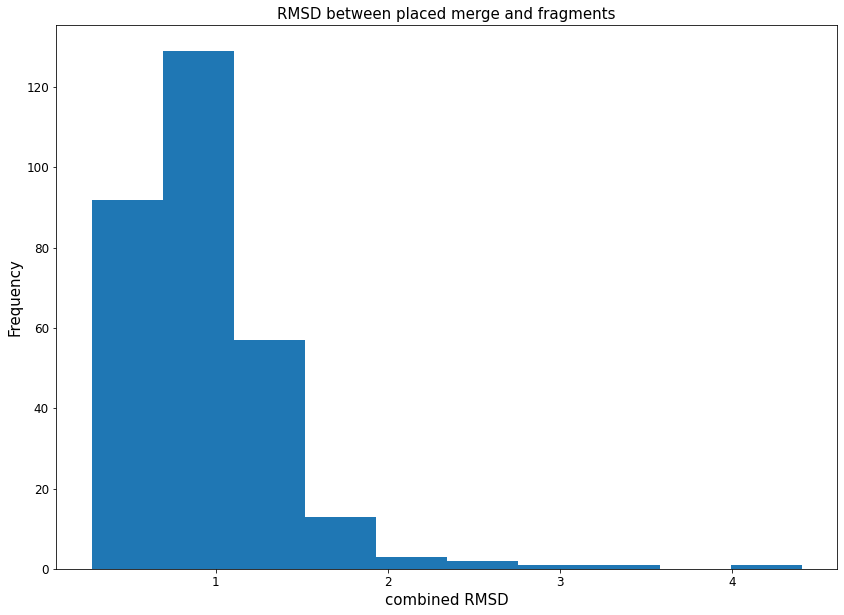

In [48]:
plt.figure(figsize=(14,10))
plt.hist(comRMSDs)
plt.title('RMSD between placed merge and fragments', fontsize=15)
plt.xlabel('combined RMSD', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

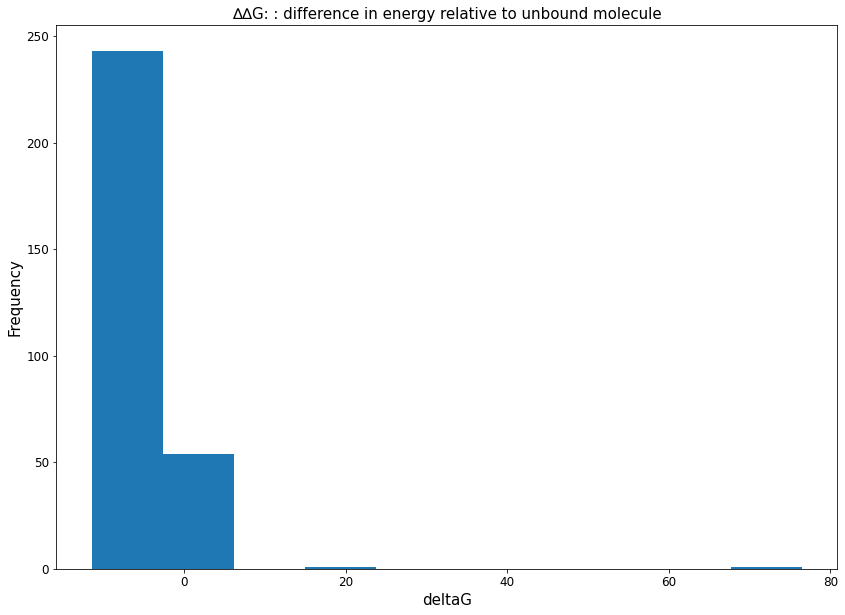

In [49]:
plt.figure(figsize=(14,10))
plt.hist(deltaGs)
plt.title('∆∆G: : difference in energy relative to unbound molecule', fontsize=15)
plt.xlabel('deltaG', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

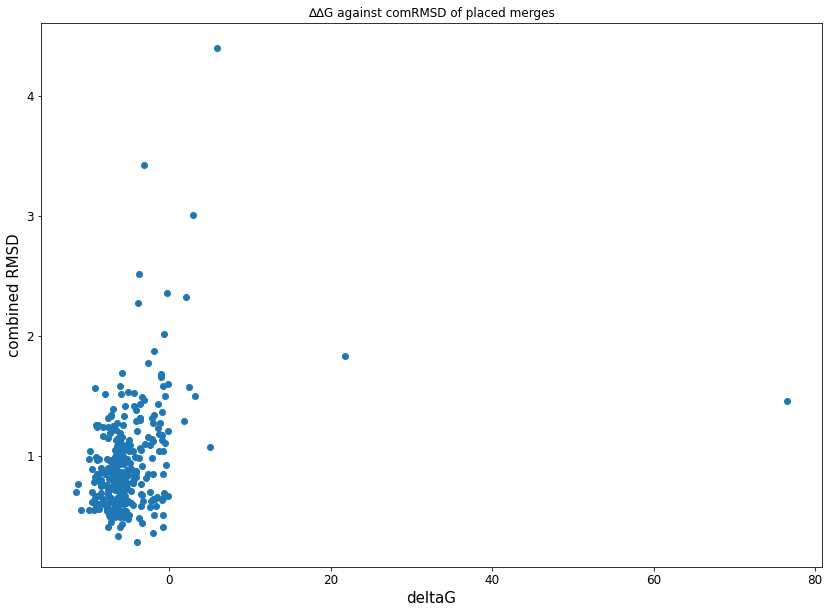

In [50]:
plt.figure(figsize=(14,10))
plt.scatter(deltaGs, comRMSDs)
plt.title('∆∆G against comRMSD of placed merges')
plt.xlabel('deltaG', fontsize=15)
plt.ylabel('combined RMSD', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [27]:
count = 0
for dG, rmsd in zip(deltaG, comRMSDs):
    if dG < 0 and rmsd <= 1:
        count += 1

print('Number of compounds with comRMSD < 1A and negative ∆∆G: ', count)

Number of compounds with comRMSD < 1A and negative ∆∆G:  141


In [54]:
count = 0

for r, dG, rmsd in zip(regarded, deltaGs, comRMSDs):
    if r == 2:
        if dG < 0:
            if rmsd < 1.5:
                count += 1

print(count)

74


In [55]:
filtered = []

for i, r in enumerate(regarded):
    if r == 2:
        filtered.append(i)

In [56]:
comRMSDs[0,1,2]

TypeError: list indices must be integers or slices, not tuple

In [ ]:
plt.figure(figsize=(14,10))
plt.hist([comRMSDs[i] for i in filtered])
plt.title('RMSD between placed merge and fragments: where 2 fragments are regarded', fontsize=15)
plt.xlabel('combined RMSD', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()